In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import torch
from importlib import reload
print(os.getpid())
sys.path.append(r"/lab/weissman_imaging/puzheng/Softwares")

3697438


In [2]:
library_master_folder = r'/lab/solexa_weissman/puzheng/MERFISH_Probes/'
# Define the output files
library_folder = os.path.join(library_master_folder, 'Brain_MS_immune', 'MF3-msBrain_immune_redesign')
print(f"- library will be saved in: {library_folder}")

label_key = 'annotation'

- library will be saved in: /lab/solexa_weissman/puzheng/MERFISH_Probes/Brain_MS_immune/MF3-msBrain_immune_redesign


In [3]:
target_gene_mean_exp_filename = os.path.join(library_folder, 'marker_gene_mean_exp.csv')
gene_mean_exp_df = pd.read_csv(target_gene_mean_exp_filename).rename({'gene_symbols':'Name'},axis=1).set_index('Name')
target_gene_umi_frac_filename = os.path.join(library_folder, 'marker_gene_umi_frac.csv')
gene_umi_frac_df = pd.read_csv(target_gene_umi_frac_filename).rename({'gene_symbols':'Name'},axis=1).set_index('Name')

celltype_num_filename = os.path.join(library_folder, 'celltype_num.csv')
celltype_num = pd.read_csv(celltype_num_filename).set_index('Unnamed: 0')
# 
# The output codebook filename
codebook_file = os.path.join(library_folder, 'codebook.csv')
# load kept_genes
kept_gene_filename = os.path.join(library_folder, 'kept_gene_info.csv')
kept_gene_df = pd.read_csv(kept_gene_filename).rename({'Unnamed: 0':'Name'},axis=1).set_index('Name')

In [4]:
_groups = np.unique(list(kept_gene_df['Group']) + ['blank'])

In [5]:
_groups, len(_groups)

(array(['B cells-1', 'B cells-2', 'DC1 & DC2', 'DC3', 'Microglia-1',
        'Microglia-2', 'Mono/MACS-1', 'Mono/MACS-2', 'Monocytes',
        'NK cells', 'Neutrophils-1', 'Neutrophils-2', 'T-myeloid', 'blank',
        'pDC'], dtype='<U13'),
 15)

In [6]:
kept_gene_df

,Transcript,Num_Candidate_Probes,Group,Neutrophils-1,Mono/MACS-1,Mono/MACS-2,Neutrophils-2,NK cells,T-myeloid,Microglia-1,B cells-1,B cells-2,Microglia-2,DC1 & DC2,pDC,DC3,Monocytes
Name,,,,,,,,,,,,,,,,,
Trbc1,ENSMUST00000192856.6,148,NK cells,0.010256,0.005703,0.044568,0.003012,0.204334,0.259868,0.004167,0.059322,0.005181,0.130890,0.046053,0.000000,0.098592,0.059701
Trac,ENSMUST00000198398.5,507,DC1 & DC2,0.032479,0.017110,0.072423,0.000000,0.151703,0.457237,0.000000,0.055085,0.020725,0.324607,0.177632,0.000000,0.126761,0.119403
Ifng,ENSMUST00000068592.5,504,B cells-1,0.022222,0.000000,0.089136,0.015060,0.835913,0.476974,0.000000,0.029661,0.000000,0.068063,0.092105,0.000000,0.000000,0.089552
Ly6g,ENSMUST00000190262.2,237,Neutrophils-2,4.283760,0.005703,0.044568,0.210843,0.089783,0.180921,0.012500,0.012712,0.015544,0.267016,0.026316,0.000000,0.647887,0.000000
Il17f,ENSMUST00000039046.10,531,DC1 & DC2,0.000000,0.000000,0.000000,0.000000,0.000000,0.009868,0.000000,0.000000,0.000000,0.010471,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4933421O10Rik,ENSMUST00000155691.2,1642,Mono/MACS-2,0.059829,0.114068,0.153203,0.039157,0.058824,0.203947,0.495833,0.076271,0.067358,0.701571,0.151316,0.033613,0.084507,0.179104
Lncpint,ENSMUST00000230209.3,1751,Neutrophils-2,0.082051,0.313688,0.228412,0.108434,0.247678,0.342105,0.383333,0.262712,0.450777,0.335079,0.315789,0.521008,0.309859,0.343284
Gm15987,ENSMUST00000141700.2,640,pDC,0.058120,0.127376,1.125348,0.009036,0.046440,0.236842,0.004167,0.394068,0.176166,0.099476,0.815789,0.058824,0.140845,1.119403


In [7]:
num_genes = len(kept_gene_df)
print(num_genes)

368


# load codebook

## load covering design

In [8]:
# analysis 
from ChromAn.src.library_tools.design_codebook import barcode_to_matrix, HammingDist_for_matrix, remove_bad_barcodes

In [9]:
covering_folder = '/lab/solexa_weissman/puzheng/References/Encoding_Design'
#covering_folder = r'Y:\References\Encoding_Design' # mapped this folder in Windows

num_bits = 22
hamming_weight = 4
hamming_distance = 4


covering_design_filename = os.path.join(covering_folder, f'covering_v{num_bits}_k{hamming_weight}_t{int(hamming_weight + 1 - (hamming_distance / 2))}.txt')
print(covering_design_filename)
design_df = pd.read_csv(covering_design_filename, header=None, delimiter='\s+')
print(len(design_df))
design_barcodes = design_df.values - 1

design_matrix = barcode_to_matrix(design_barcodes)


/lab/solexa_weissman/puzheng/References/Encoding_Design/covering_v22_k4_t3.txt
385


minimum hamming distance: 4


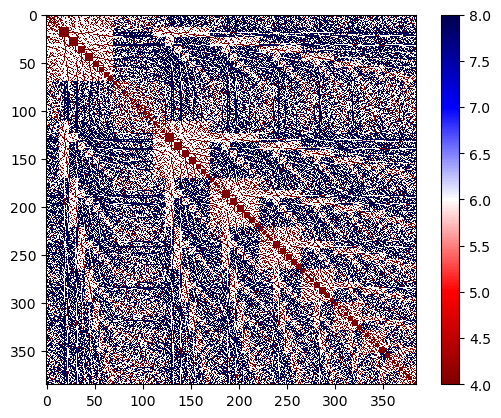

In [10]:
# check hamming distances
distmat = HammingDist_for_matrix(design_matrix)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(distmat, cmap='seismic_r', vmin=4, vmax=8, interpolation='nearest')
plt.colorbar()
plt.show()

In [11]:
# reduce map if necessary
reduced_design_barcodes = remove_bad_barcodes(design_barcodes, 
                                              min_hamming_dist=hamming_distance)
code_length = len(np.unique(reduced_design_barcodes))

minimum hamming distance: 4


# Select subset of possible codes

from MERFISH_probe_design.hamming_codes import code_selection, hamming_code_analysis
import MERFISH_probe_design.codebook_design.codebook_design_stochastic as cds
import MERFISH_probe_design.IO.file_io as fio

## optimization principles:
1. std of each

In [12]:
from tqdm import tqdm
# Initialize codes:
def _optimizer_group_stderr(_gene_group_df, _gene_code_df):
    _groups, _group_sizes = np.unique(_gene_group_df['Group'], return_counts=True)
    _valid_groups = [_g for _g in _groups if _g.lower() != 'blank']
    _optimizers = []
    for _group in _groups:
        _group_exp_df = _gene_group_df.loc[_gene_group_df['Group'] == _group, _valid_groups]
        _group_code_df = _gene_code_df.loc[_gene_group_df['Group'] == _group]
        # Group optimizer:
        _group_exp_vector = (_group_exp_df.values.transpose() @ _group_code_df.values).sum(0)
        _group_exp_stderr = np.std(_group_exp_vector) / np.mean(_group_exp_vector)
        _optimizers.append(_group_exp_stderr)
    return np.array(_optimizers)

def _group_bit_mean_exp(_gene_group_df, _gene_code_df):
    _groups, _group_sizes = np.unique(_gene_group_df['Group'], return_counts=True)
    _valid_groups = [_g for _g in _groups if _g.lower() != 'blank']
    _mean_exps = []
    for _group in _groups:
        _group_exp_df = _gene_group_df.loc[_gene_group_df['Group'] == _group, _valid_groups]
        _group_code_df = _gene_code_df.loc[_gene_group_df['Group'] == _group]
        # Group optimizer:
        _group_exp_vector = (_group_exp_df.values.transpose() @ _group_code_df.values).sum(0)
        _mean_exps.append(_group_exp_vector)
    return pd.DataFrame(_mean_exps, columns=_gene_code_df.columns, index=_groups)

def swap_code(gene_code_df, gene_group_df, i, j):
    _gene_code_df = gene_code_df.copy()
    _gene_code_df.iloc[i], _gene_code_df.iloc[j] =  _gene_code_df.iloc[j].copy(), _gene_code_df.iloc[i].copy()
    # compare optimizer:
    _old_optimizer = _optimizer_group_stderr(gene_group_df, gene_code_df)
    _new_optimizer = _optimizer_group_stderr(gene_group_df, _gene_code_df)
    if np.sum(_new_optimizer) - np.sum(_old_optimizer) < 0:
        return _gene_code_df
    else:
        return gene_code_df
    
def shuffle_group_codes(gene_code_df, gene_group_df, group, n_iters=100, verbose=False):
    # skip blank
    #if group.lower() == 'blank':
    #    return gene_code_df
    _group = group
    _gene_code_df = gene_code_df.copy()
    _groups, _group_sizes = np.unique(gene_group_df['Group'], return_counts=True)
    _valid_groups = [_g for _g in _groups if _g.lower() != 'blank']
    # calculate current optimizer:
    _min_optimizer = _optimizer_group_stderr(gene_group_df, _gene_code_df)[list(_groups).index(_group)]
    if verbose:
        print(f"- shuffle group: Start={_min_optimizer:.5f}", end=', ')
    _group_codes = _gene_code_df.loc[gene_group_df['Group'] == _group].values # get current group_code
    _group_exp_df = gene_group_df.loc[gene_group_df['Group'] == _group, _valid_groups]
    for _iter in range(n_iters):
        # Group optimizer:
        _group_exp_vector = (_group_exp_df.values.transpose() @ _group_codes).sum(0)
        _group_exp_stderr = np.std(_group_exp_vector) / np.mean(_group_exp_vector)
        if np.isfinite(_group_exp_stderr) and _group_exp_stderr < _min_optimizer:
            #print(_iter, f"{_group_exp_stderr:.5f}")
            _min_optimizer = _group_exp_stderr
            _gene_code_df.loc[gene_group_df['Group'] == _group] = _group_codes
        # shuffle
        np.random.shuffle(_group_codes)
    if verbose:
        print(f"End={_min_optimizer:.5f} after {n_iters}-iters.")
    return _gene_code_df
    
    
def barcode_to_matrix(barcodes, num_bits=None):
    try:
        _num_bits = int(num_bits)
    except:
        _num_bits = max(len(np.unique(barcodes)), np.max(barcodes)+1)
    _matrix = np.zeros([len(barcodes), _num_bits], dtype=np.int32)
    for _i, _b in enumerate(barcodes):
        _matrix[_i][_b] = 1
    return _matrix
def generate_random_partition(candidate_codes, group_sizes):
    _codes = np.array(candidate_codes).copy()
    np.random.shuffle(_codes)
    _group_codes, _rest_codes = [], []
    _start = 0
    for _i, _gs in enumerate(group_sizes):
        _group_codes.append(_codes[_start:_start+_gs])
        _start += _gs
    # rest
    _rest_codes = _codes[_start:]
    return _group_codes, _rest_codes
    
    
    
def Select_optimized_barcodes(reduced_design_barcodes, kept_gene_df, 
                              shuffle_n_iters = 1000, swap_n_iters = 100, total_n_iters = 10,
                              verbose=True,
                              ):
    # Internalize params
    _candidate_barcodes = reduced_design_barcodes.copy()
    _candidate_codes = barcode_to_matrix(_candidate_barcodes)
    _num_bits = np.max(_candidate_barcodes) + 1 # assume barcode start as 1
    # group and expression
    _gene_group_df = kept_gene_df.copy()
    _mean_exp = np.mean(_gene_group_df[np.unique(_gene_group_df['Group'])].values)
    # append blank
    _blank_names = [f"blank-{_ib}" for _ib in range(len(_candidate_barcodes) - len(_gene_group_df))]
    _blank_group_df = pd.DataFrame(columns=_gene_group_df.columns, index=_blank_names)
    _blank_group_df['Group'] = 'blank'
    _gene_code_df = pd.DataFrame(columns=np.unique(_candidate_barcodes), index=list(_gene_group_df.index)+list(_blank_names)).fillna(0) 
    _gene_group_df = pd.concat([_gene_group_df, _blank_group_df], axis=0).fillna(_mean_exp/2)
    # find groups
    _groups, _group_sizes = np.unique(_gene_group_df['Group'], return_counts=True)
    #_valid_groups = [_g for _g in _groups if _g.lower() != 'blank']

    # random generate
    _group_codes_list, _rest_codes = generate_random_partition(_candidate_codes, _group_sizes)
    # first assign:
    for _group, _group_codes in zip(_groups, _group_codes_list):
        _gene_code_df.loc[_gene_group_df['Group'] == _group] = _group_codes
    # save init scores
    init_mean_exp_df = _group_bit_mean_exp(_gene_group_df, _gene_code_df)
    # print current status
    _init_optimizer = _optimizer_group_stderr(_gene_group_df, _gene_code_df)
    print(np.round(_init_optimizer, 5))
    
    for _total_iter in range(total_n_iters):
        # shuffle within groups
        for _group in _groups:
            _gene_code_df = shuffle_group_codes(_gene_code_df, _gene_group_df, _group, n_iters=shuffle_n_iters)
        # swap
        for _iter in tqdm(range(swap_n_iters)):
            _gene_code_df = swap_code(_gene_code_df, _gene_group_df, *np.random.randint(0, len(_gene_group_df), 2))
        # print current status
        _curr_optimizer = _optimizer_group_stderr(_gene_group_df, _gene_code_df)
        print(np.round(_curr_optimizer, 5))

    # final evaluation
    mean_exp_df = _group_bit_mean_exp(_gene_group_df, _gene_code_df)
    # return
    return _gene_group_df, _gene_code_df, init_mean_exp_df, mean_exp_df

In [13]:
%%time
_gene_group_df, _gene_code_df, init_mean_exp_df, mean_exp_df = Select_optimized_barcodes(reduced_design_barcodes, kept_gene_df)

[1.01978 0.64641 0.48343 0.45974 0.95565 0.61876 0.45215 0.72642 0.37168
 1.57082 0.82302 1.28219 0.37112 0.57635 0.47534]


100%|██████████| 100/100 [00:04<00:00, 23.06it/s]


[0.93104 0.47524 0.29315 0.38802 0.85292 0.40564 0.36125 0.55029 0.24385
 1.33994 0.76708 1.04277 0.28739 0.44605 0.26968]


100%|██████████| 100/100 [00:04<00:00, 22.04it/s]


[0.92678 0.41556 0.29184 0.35018 0.80645 0.34845 0.30163 0.51114 0.1905
 1.32687 0.74516 1.01973 0.26676 0.42418 0.20775]


100%|██████████| 100/100 [00:04<00:00, 23.63it/s]


[0.92654 0.41904 0.29694 0.27678 0.80264 0.30981 0.25942 0.51365 0.19051
 1.31597 0.71249 1.01503 0.22193 0.35048 0.20179]


100%|██████████| 100/100 [00:04<00:00, 23.90it/s]


[0.93414 0.41562 0.29004 0.25732 0.80195 0.26628 0.25699 0.499   0.19051
 1.31596 0.69923 1.00672 0.19083 0.32219 0.20179]


100%|██████████| 100/100 [00:04<00:00, 23.84it/s]


[0.93214 0.41562 0.28084 0.23161 0.79873 0.26546 0.25682 0.4596  0.18916
 1.31596 0.68429 1.00254 0.18528 0.32219 0.19536]


100%|██████████| 100/100 [00:04<00:00, 23.47it/s]


[0.92443 0.41076 0.28084 0.22701 0.7684  0.26546 0.25841 0.45405 0.18716
 1.31799 0.67516 1.00254 0.18528 0.27433 0.20021]


100%|██████████| 100/100 [00:04<00:00, 21.92it/s]


[0.92205 0.37476 0.22992 0.22701 0.7684  0.2331  0.25841 0.45694 0.18716
 1.31675 0.66997 0.99842 0.17402 0.27433 0.20021]


100%|██████████| 100/100 [00:04<00:00, 21.94it/s]


[0.90783 0.33717 0.22153 0.20099 0.76094 0.2331  0.25723 0.4497  0.17657
 1.31734 0.67589 0.99596 0.15892 0.27433 0.2046 ]


100%|██████████| 100/100 [00:04<00:00, 22.42it/s]


[0.8959  0.33717 0.20392 0.20099 0.76254 0.2331  0.25769 0.43204 0.17115
 1.31261 0.67477 0.99596 0.15892 0.27433 0.2046 ]


100%|██████████| 100/100 [00:04<00:00, 22.56it/s]


[0.89777 0.33141 0.20392 0.19625 0.7619  0.22055 0.25769 0.42989 0.17136
 1.31261 0.66547 0.99477 0.15892 0.25641 0.19507]
CPU times: user 1min 5s, sys: 1.36 s, total: 1min 6s
Wall time: 1min 3s


%%time
import multiprocessing as mp
with mp.Pool(12) as _pool:
    results = _pool.starmap(Select_optimized_barcodes,
                            [(reduced_design_barcodes, kept_gene_df, 1000, 100, 1) for _i in range(12)], chunksize=1)
    _pool.close()
    _pool.join()
    _pool.terminate()

## Plot design criteria

In [14]:
_groups = np.unique(list(kept_gene_df['Group']) + ['blank'])

figure_folder = os.path.join(library_folder, 'figures')
if not os.path.exists(figure_folder):
    os.makedirs(figure_folder)
import time
import seaborn as sns


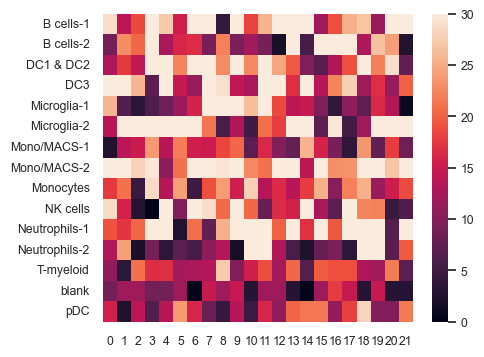

In [15]:
sns.set(font_scale=0.8) 
fig, ax = plt.subplots(figsize=(5,4), dpi=100)
sns.heatmap(init_mean_exp_df,ax=ax, annot=False, annot_kws={'size': 3},
            yticklabels=_groups, vmin=0, vmax=30)
plt.savefig(os.path.join(figure_folder, 
                         f"{time.localtime().tm_year}_{time.localtime().tm_mon}_{time.localtime().tm_mday}_mean_exp_by_bit_init.png"), 
            transparent=True)
fig.show()

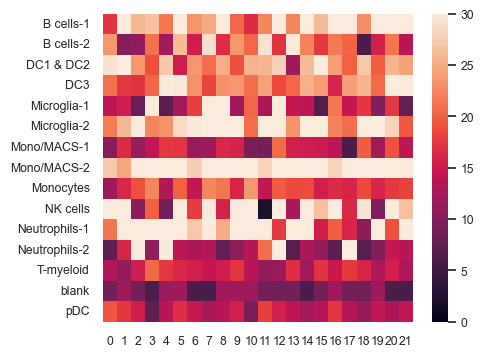

In [16]:
import seaborn as sns
sns.set(font_scale=0.8) 
fig, ax = plt.subplots(figsize=(5,4), dpi=100)
sns.heatmap(mean_exp_df,ax=ax, annot=False, annot_kws={'size': 3},
            yticklabels=_groups, vmin=0, vmax=30)
plt.savefig(os.path.join(figure_folder, 
                         f"{time.localtime().tm_year}_{time.localtime().tm_mon}_{time.localtime().tm_mday}_mean_exp_by_bit_final.png"), 
            transparent=True)
fig.show()

In [17]:
# convert into standard format:
gene_codes, rest_codes = [], []
for _gene, _code in _gene_code_df.iterrows():
    if 'blank' not in _gene:
        gene_codes.append(np.where(_code.values)[0])
    else:
        rest_codes.append(np.where(_code.values)[0])

In [21]:
# select reasonable subset of rest_codes
# Select blank barcodes randomly
N_blank = 15
from MERFISH_probe_design.hamming_codes import code_selection, hamming_code_analysis

#np.random.shuffle(rest_codes)
#blank_codes = rest_codes[:N_blank]
blank_codes, _ = code_selection.find_subset_code_even_coverage(
    rest_codes, code_length, N_blank, N_rounds=20)

Round = 1, variance = 0.3801652892561984
Round = 2, variance = 0.47107438016528924
Round = 3, variance = 0.3801652892561984
Round = 4, variance = 0.47107438016528924
Round = 5, variance = 0.3801652892561984
Round = 6, variance = 0.3801652892561984
Round = 7, variance = 0.4710743801652892
Round = 8, variance = 0.47107438016528924
Round = 9, variance = 0.47107438016528924
Round = 10, variance = 0.3801652892561984
Round = 11, variance = 0.4710743801652892
Round = 12, variance = 0.47107438016528924
Round = 13, variance = 0.652892561983471
Round = 14, variance = 0.4710743801652892
Round = 15, variance = 0.5619834710743802
Round = 16, variance = 0.47107438016528924
Round = 17, variance = 0.47107438016528924
Round = 18, variance = 0.4710743801652893
Round = 19, variance = 0.3801652892561984
Round = 20, variance = 0.4710743801652892


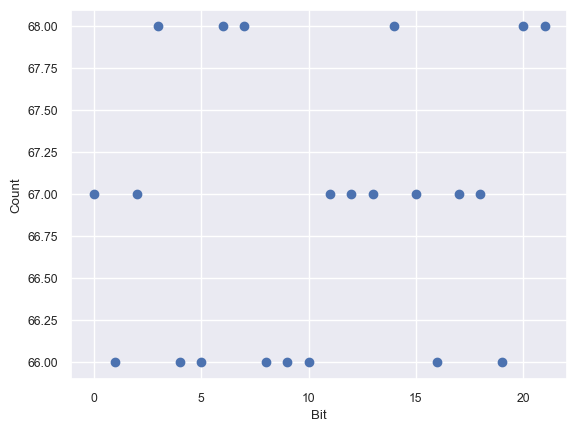

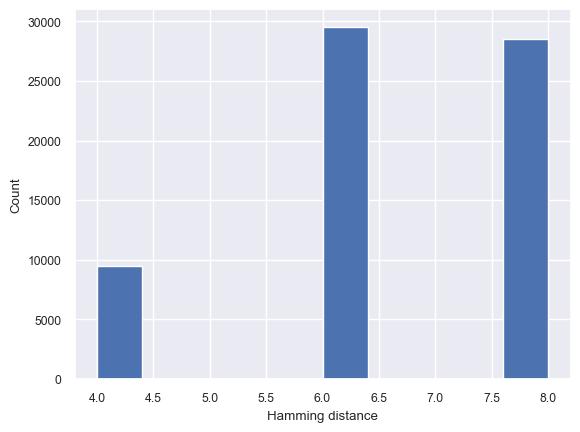

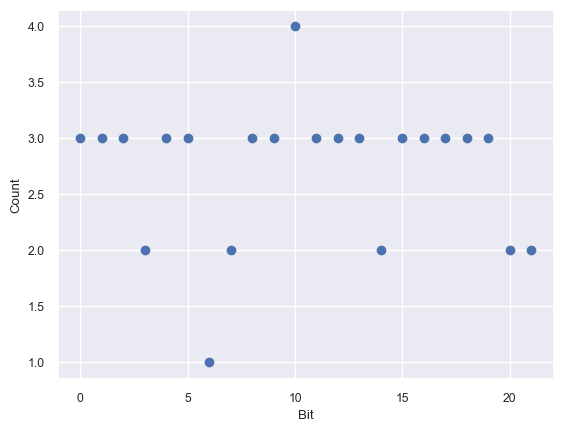

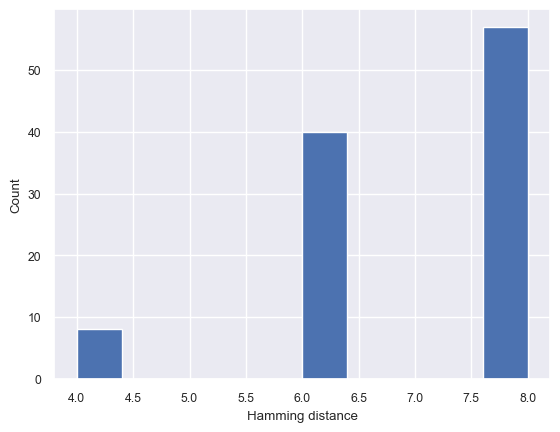

In [22]:
# Plot distributions of gene codes
hamming_code_analysis.plot_bit_coverage(gene_codes, code_length)
hamming_code_analysis.plot_pairwise_hamming_distance_distribution(gene_codes)
# Plot distributions of blank codes
hamming_code_analysis.plot_bit_coverage(blank_codes, code_length)
hamming_code_analysis.plot_pairwise_hamming_distance_distribution(blank_codes)

# Assign genes to bits

In [23]:
# Load the gene expressions for each cell cluster.
# This is a matrix of shape N_clusters x N_genes_of_interest.
# Each element is the expression level of a gene in a cluster.
cluster_gene_exp = kept_gene_df[np.unique(kept_gene_df['Group'])].transpose() #gene_mean_exp_df.values.transpose()
# Normalize the expressions, such that the sum of all expressions are N_clusters.
# The normalization is important for the subsequent simulated annealing.
cluster_gene_exp_normalized = cluster_gene_exp / np.sum(cluster_gene_exp) * cluster_gene_exp.shape[0]

In [24]:
# Load the cluster sizes
cluster_sizes = celltype_num[label_key].values
# Log normalize the cluster sizes
cluster_sizes_log_normalized = np.log(cluster_sizes + 1) / np.sum(np.log(cluster_sizes + 1))

In [25]:
# Convert the gene codes to binary codes
import MERFISH_probe_design.codebook_design.codebook_design_stochastic as cds

gene_binary_codes = np.array([cds.on_bits_to_binary_code(c, code_length) for c in gene_codes])

In [26]:
gene_binary_codes.shape

(368, 22)

In [27]:
cluster_gene_exp

Name,Trbc1,Trac,Ifng,Ly6g,Il17f,Batf3,Ly6c1,Csf3r,Il6,Arg1,...,Mirt1,BE692007,Mir99ahg,F630028O10Rik,Gm19585,4933421O10Rik,Lncpint,Gm15987,2310001H17Rik,Eldr
B cells-1,0.059322,0.055085,0.029661,0.012712,0.000000,0.033898,0.008475,0.101695,0.000000,0.008475,...,0.165254,0.432203,0.000000,0.008475,0.110169,0.076271,0.262712,0.394068,0.139831,0.004237
B cells-2,0.005181,0.020725,0.000000,0.015544,0.000000,0.005181,0.000000,0.051813,0.000000,0.015544,...,0.093264,0.430052,0.005181,0.005181,0.000000,0.067358,0.450777,0.176166,0.005181,0.000000
DC1 & DC2,0.046053,0.177632,0.092105,0.026316,0.000000,0.894737,0.131579,0.210526,0.006579,0.032895,...,0.032895,0.131579,0.000000,0.078947,0.065789,0.151316,0.315789,0.815789,0.184211,0.013158
DC3,0.098592,0.126761,0.000000,0.647887,0.000000,1.225352,0.112676,0.225352,0.070423,0.028169,...,0.070423,0.028169,0.028169,0.056338,0.070423,0.084507,0.309859,0.140845,0.140845,0.000000
Microglia-1,0.004167,0.000000,0.000000,0.012500,0.000000,0.029167,0.000000,0.425000,0.004167,0.004167,...,0.020833,0.000000,0.425000,0.004167,0.000000,0.495833,0.383333,0.004167,0.012500,0.000000
Microglia-2,0.130890,0.324607,0.068063,0.267016,0.010471,0.256545,0.062827,2.198953,0.041885,0.047120,...,0.099476,0.141361,0.418848,0.057592,0.125654,0.701571,0.335079,0.099476,0.209424,0.015707
Mono/MACS-1,0.005703,0.017110,0.000000,0.005703,0.000000,0.020913,0.000000,0.203422,0.007605,0.258555,...,0.051331,0.011407,0.005703,0.068441,0.001901,0.114068,0.313688,0.127376,0.041825,0.003802
Mono/MACS-2,0.044568,0.072423,0.089136,0.044568,0.000000,0.233983,0.069638,1.465181,0.022284,0.100279,...,0.161560,0.172702,0.022284,0.181059,0.052925,0.153203,0.228412,1.125348,0.395543,0.011142
Monocytes,0.059701,0.119403,0.089552,0.000000,0.000000,0.179104,0.134328,0.865672,0.014925,0.000000,...,0.388060,0.194030,0.000000,0.089552,0.089552,0.179104,0.343284,1.119403,0.402985,0.000000
NK cells,0.204334,0.151703,0.835913,0.089783,0.000000,0.021672,0.018576,0.164087,0.003096,0.024768,...,0.170279,0.021672,0.009288,0.040248,1.049536,0.058824,0.247678,0.046440,0.170279,0.006192


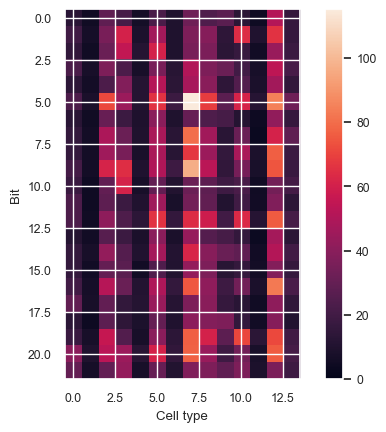

In [28]:
# Plot the distribution of numbers of bright dots in cells before optimization
# The values have the unit dot per million transcripts
cds.plot_dot_distribution(cluster_gene_exp, gene_binary_codes)

In [29]:
cluster_gene_exp_normalized

Name,Trbc1,Trac,Ifng,Ly6g,Il17f,Batf3,Ly6c1,Csf3r,Il6,Arg1,...,Mirt1,BE692007,Mir99ahg,F630028O10Rik,Gm19585,4933421O10Rik,Lncpint,Gm15987,2310001H17Rik,Eldr
B cells-1,0.891440,0.495887,0.241611,0.030697,0.000000,0.144340,0.160912,0.096074,0.000000,0.014603,...,1.009136,3.446019,0.000000,0.074942,0.858504,0.441493,0.866584,1.250470,0.620735,0.069087
B cells-2,0.077861,0.186575,0.000000,0.037536,0.000000,0.022062,0.000000,0.048950,0.000000,0.026785,...,0.569524,3.428864,0.076815,0.045820,0.000000,0.389897,1.486939,0.559016,0.023001,0.000000
DC1 & DC2,0.692039,1.599086,0.750267,0.063548,0.000000,3.809816,2.498375,0.198890,0.347859,0.056682,...,0.200874,1.049098,0.000000,0.698146,0.512669,0.875887,1.041667,2.588693,0.817747,0.214533
DC3,1.481547,1.141132,0.000000,1.564526,0.000000,5.217586,2.139453,0.212896,3.723560,0.048539,...,0.430040,0.224596,0.417611,0.498208,0.548773,0.489166,1.022105,0.446935,0.625239,0.000000
Microglia-1,0.062613,0.000000,0.000000,0.030185,0.000000,0.124193,0.000000,0.401509,0.220311,0.007180,...,0.127220,0.000000,6.300711,0.036847,0.000000,2.870116,1.264468,0.013222,0.055490,0.000000
Microglia-2,1.966901,2.922201,0.554423,0.644793,7.207451,1.092374,1.192941,2.077411,2.214641,0.081195,...,0.607459,1.127093,6.209508,0.509293,0.979172,4.061020,1.105294,0.315662,0.929675,0.256092
Mono/MACS-1,0.085706,0.154031,0.000000,0.013773,0.000000,0.089046,0.000000,0.192178,0.402088,0.445527,...,0.313455,0.090948,0.084554,0.605237,0.014815,0.660282,1.034735,0.404195,0.185670,0.061994
Mono/MACS-2,0.669733,0.651974,0.726084,0.107624,0.000000,0.996308,1.322260,1.384196,1.178263,0.172794,...,0.986576,1.376977,0.330367,1.601134,0.412420,0.886813,0.753443,3.570995,1.755894,0.181666
Monocytes,0.897142,1.074897,0.729470,0.000000,0.000000,0.762632,2.550580,0.817823,0.789172,0.000000,...,2.369712,1.547028,0.000000,0.791927,0.697843,1.036741,1.132359,3.552130,1.788930,0.000000
NK cells,3.070558,1.365668,6.809142,0.216810,0.000000,0.092279,0.352712,0.155017,0.163698,0.042678,...,1.039818,0.172793,0.137695,0.355918,8.178584,0.340498,0.816993,0.147364,0.755901,0.100957


In [30]:
#reload(MERFISH_probe_design.codebook_design.codebook_design_stochastic)
import MERFISH_probe_design.codebook_design.codebook_design_stochastic as cds
from importlib import reload

In [31]:
%%time
# Optimize the code assigment to let cells have evenly distributed dots for each bit
# Use the log of cluster sizes to weight the divergence which we want to minimize
best_score, best_codes = cds.optimize_bit_assignments_simulated_annealing_parallel(
    cluster_gene_exp_normalized, cluster_sizes_log_normalized, gene_binary_codes,
    N_test=32, N_threads=1, N_rounds=1, N_iter=2000)

Not multi-processing if N_threads==1. 
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finished with best score = 0.0.
Simulated annealing finis

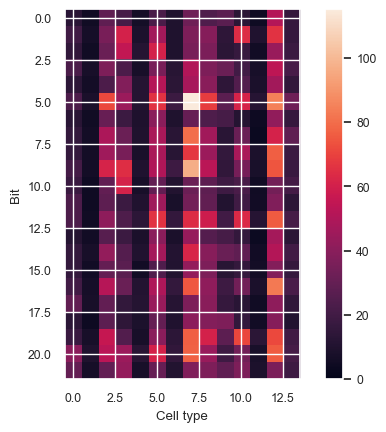

,cell_type_weights
0,0.084272
1,0.082869
2,0.077830
3,0.076799
4,0.076436
5,0.075637
6,0.072523
7,0.072302
8,0.069655
9,0.069518


In [32]:
# The dot distribution is better now.
# There are vertical strip patterns that our optimization didn't change. 
# This is because we can only optimize the distribution across bits.
# The total number of bright dots for each cell type is always 4 x N_expressed_transcripts.
cds.plot_dot_distribution(cluster_gene_exp, best_codes)

# Note that dots in some of the cell types with few cells are not very evenly distributed
pd.DataFrame({'cell_type_weights': cluster_sizes_log_normalized})

# load readouts

In [33]:

from ChromAn.src.library_tools.primers import load_fasta_to_DataFrame

readout_folder = r'/lab/solexa_weissman/puzheng/References/Readouts'
readout_filename = os.path.join(readout_folder, 'updated_Stvs.fasta')
print(f"Loading readouts from file: {readout_filename}")
readouts_all = load_fasta_to_DataFrame(readout_filename)
# select
start_bit = 0
readouts = readouts_all[start_bit:start_bit+num_bits]
readouts.loc[:,'Name'] = np.array([_n.split(' ')[0] for _n in readouts['Name']])
#print(readouts)
readouts_names = list(readouts['Name'])

Loading readouts from file: /lab/solexa_weissman/puzheng/References/Readouts/updated_Stvs.fasta


/tmp/ipykernel_3697438/3359604334.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readouts.loc[:,'Name'] = np.array([_n.split(' ')[0] for _n in readouts['Name']])


## Save readout file

In [34]:
# save readouts
readout_savefile = os.path.join(library_folder, 'readouts.csv')
print(f"Saving readouts to file: {readout_savefile}")
readouts.to_csv(readout_savefile, index=None)

Saving readouts to file: /lab/solexa_weissman/puzheng/MERFISH_Probes/Brain_MS_immune/MF3-msBrain_immune_redesign/readouts.csv


## Save codebook

In [35]:
len(kept_gene_df), len(best_codes)

(368, 368)

In [36]:
import MERFISH_probe_design.IO.file_io as fio
# Get a list of gene names including the blank barcodes
gene_names = list(kept_gene_df.index.values) + [f'Blank-{i + 1}' for i in range(N_blank)]

# Get a list of transcript names including the blank barcodes
gene_2_transcript = {_gene:_transcript for _gene, _transcript in kept_gene_df['Transcript'].items()}
transcript_names = [gene_2_transcript[_g] for _g in list(kept_gene_df.index.values)] + [f'' for i in range(N_blank)]

# Convert the barcodes into strings of '1' and '0'.
barcode_binarys = list(best_codes) + [cds.on_bits_to_binary_code(c, code_length) for c in blank_codes]
barcode_strings  = [''.join([str(b) for b in c]) for c in barcode_binarys]

# Write the codebook
print(f"Saving codebook to file: {codebook_file}")
fio.write_merlin_codebook(codebook_file, '1.0', 'MF3-msBrain_Immune', readouts_names, gene_names, transcript_names, barcode_strings)

Saving codebook to file: /lab/solexa_weissman/puzheng/MERFISH_Probes/Brain_MS_immune/MF3-msBrain_immune_redesign/codebook.csv


## Manually check codebook now!